<a href="https://colab.research.google.com/github/pondels/CSE450/blob/main/module4/Module_4_Nathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# work with the data 
import pandas as pd
from datetime import datetime
import numpy as np

#create graphs
import matplotlib.pyplot as plt
import seaborn as sns

#create a NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LeakyReLU, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#judge the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV




bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

debug = False

#Explore the data

In [2]:
bikes
bikes.describe()
bikes.info()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,36.471239,154.005770
std,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,49.995203,151.319818
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,4.000000,35.000000
50%,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,17.000000,116.000000
75%,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,50.000000,220.000000
max,4.000000,23.000000,1.000000,1.000000,4.000000,1.000000,57.000000,39.000000,50.000000,367.000000,886.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


#Scatter plots

In [3]:

sns.scatterplot(data= bikes, x = "hr", y = "registered")
sns.scatterplot(data= bikes, x = "hr", y = "casual")
sns.barplot(data= bikes, x = bikes.index, y = "total")

# giant pairplot
# sns.pairplot(bikes)



#Visualize data

In [4]:
for column in bikes[["season", "hr", "holiday", "workingday", "weathersit"]].columns:
  print(bikes[column].value_counts())
  # categorical
  # print(bikes[column].value_counts().groupby('column'))



3    4496
2    4409
1    3980
4    3752
Name: season, dtype: int64
17    699
16    699
13    698
15    698
14    698
12    697
22    697
21    697
20    697
19    697
18    697
23    697
11    696
10    696
9     696
8     696
7     696
0     695
6     694
1     693
5     686
2     684
4     667
3     667
Name: hr, dtype: int64
0    16160
1      477
Name: holiday, dtype: int64
1    11386
0     5251
Name: workingday, dtype: int64
1    11078
2     4207
3     1349
4        3
Name: weathersit, dtype: int64


#preprocess/feature engineering? 
onehot



In [5]:
def myMinMax(transformDf, referenceDf) :
  return (transformDf-referenceDf.min())/(referenceDf.max()-referenceDf.min())
#cyclical https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning
def makeItCycle(df, column, period):
  df[column+'Sin'] = np.sin(2 * np.pi * df[column]/period)
  df[column+'Cos'] = np.cos(2 * np.pi * df[column]/period)
  return df.drop(columns=[column])
def preprocess(X, X_ref):
  proc = pd.DataFrame(X,copy = True)
  datetimes = pd.to_datetime(X.dteday)
  proc["dayOfWeek"] = datetimes.dt.weekday
  proc['day'] = datetimes.dt.day
  proc['month'] = datetimes.dt.month
  proc['year'] = datetimes.dt.year
  proc['date'] = (datetimes - pd.datetime(1970,1,1)).dt.total_seconds()
  proc['rushHour'] = pd.Series(X['hr'].isin([7,8,17,18])).astype(int)
  proc = proc.drop(columns = ["dteday"])
  proc = makeItCycle(proc, 'day', 31)
  proc = makeItCycle(proc, 'month', 12)
  proc = makeItCycle(proc, 'hr', 24)
  proc = makeItCycle(proc, 'season', 4)
  proc = myMinMax(proc, X_ref)
  return proc

In [6]:
procBikes = preprocess(bikes, bikes)
procBikes.head()

C:\Users\spott\AppData\Local\Temp\ipykernel_20912\3717540687.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  proc['date'] = (datetimes - pd.datetime(1970,1,1)).dt.total_seconds()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# scaler.transform(procBikes)
X = procBikes.drop(columns=["registered", "casual", "total"])
y = procBikes["total"]
X = myMinMax(X, X)

def mySplit(X,y,kth):
  X_test = X.iloc[::kth, :]
  y_test = y.iloc[::kth]
  X_train = X[~X.index.isin(X_test.index)]
  y_train = y[~X.index.isin(y_test.index)]
  return X_train, y_train, X_test, y_test
  
X_train, y_train, X_val, y_val = mySplit(X, y, 9)
X_train, y_train, X_test, y_test = mySplit(X_train, y_train, 9)

X_test.head()
y_test.head()

,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,dayOfWeek,year,date,rushHour,daySin,dayCos,monthSin,monthCos,hrSin,hrCos,seasonSin,seasonCos
1,0.0,0.0,0.000000,0.80,0.000000,0.204082,0.2727,0.833333,0.0,0.000000,0.0,0.600779,0.989739,0.75,0.933013,0.629410,0.982963,1.0,0.5
11,0.0,0.0,0.000000,0.81,0.333333,0.346939,0.3333,0.833333,0.0,0.000000,0.0,0.600779,0.989739,0.75,0.933013,0.629410,0.017037,1.0,0.5
21,0.0,0.0,0.333333,0.87,0.228070,0.387755,0.4091,0.833333,0.0,0.000000,0.0,0.600779,0.989739,0.75,0.933013,0.146447,0.853553,1.0,0.5
31,0.0,0.0,0.666667,0.71,0.263158,0.387755,0.4091,1.000000,0.0,0.001431,1.0,0.697431,0.959375,0.75,0.933013,0.933013,0.250000,1.0,0.5
41,0.0,0.0,0.333333,0.46,0.385965,0.346939,0.3333,1.000000,0.0,0.001431,1.0,0.697431,0.959375,0.75,0.933013,0.000000,0.500000,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16595,0.0,1.0,0.000000,0.69,0.000000,0.204082,0.2727,0.500000,1.0,0.998569,0.0,0.302569,0.959375,0.25,0.933013,1.000000,0.500000,0.5,1.0
16606,0.0,1.0,0.000000,0.39,0.228070,0.326531,0.3333,0.500000,1.0,0.998569,1.0,0.302569,0.959375,0.25,0.933013,0.017037,0.370590,0.5,1.0
16616,0.0,1.0,0.000000,0.75,0.000000,0.224490,0.2879,0.666667,1.0,1.000000,0.0,0.399221,0.989739,0.25,0.933013,0.853553,0.853553,0.5,1.0
16626,0.0,1.0,0.333333,0.40,0.192982,0.387755,0.4091,0.666667,1.0,1.000000,0.0,0.399221,0.989739,0.25,0.933013,0.370590,0.017037,0.5,1.0


1         40
11        56
21        34
31         8
41        53
        ... 
16595    121
16606    561
16616      4
16626    262
16636    110
Name: total, Length: 1644, dtype: int64

#Create model

In [ ]:
def create_model(inputDim, initializer='uniform', activation='selu', optimizer='adam', dropoutRate = 0.1, numExtraLayers = 0):
    model = Sequential()
    if (activation == 'leakyRelu'): activation = LeakyReLU()
    model.add(Dense(128, input_dim=len(X_train.columns), activation=activation))
    model.add(Dropout(dropoutRate))
    model.add(Dense(256, activation=activation))
    model.add(Dropout(dropoutRate))
    for i in range(0,3):
        model.add(Dense(128, activation=activation))
    model.add(Dense(1, activation=activation))
    opt = keras.optimizers.Adam()
    model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])
    return model

model = create_model()

# model = keras.models.load_model('Module5Model')




In [ ]:
param_grid = {
    # 'initializer': ['glorot_uniform'],
    # 'optimizer': ['adam'],
    # 'numExtraLayers': [0],
    # 'dropoutRate' : [0.1],
    # 'batch_size': [24],
    'epochs': [90, 120, 150],
}


In [ ]:
# cv = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
# #grid_search = GridSearchCV(
#     estimator=KerasRegressor(create_model),
#     param_grid=param_grid,
#     cv=cv,
#     n_jobs = -1,
#     verbose = 0
# )
# todo fix
# early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
#reslts = grid_search.fit(X, y, batch_size = 24)
#grid_search.best_params_

# reslts = grid_search.fit(X, y, verbose=1, callbacks=[early_stop])
#GPU: 3 min 55
#cpu: 1:50#
# num jobs -1 cpu: 0:32.5
#best {'activation': 'selu', 'epochs': 60}
# {'activation': 'selu', 'batch_size': 24, 'epochs': 90}


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=100)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=24, callbacks=[early_stop],shuffle=False)
history = model.fit(X_train, y_train, epochs=2000, verbose=0, validation_split = .2, batch_size=25,
                    callbacks=[early_stop], shuffle=False)
                    
try:
    hist = pd.concat([hist, pd.DataFrame(history.history)])
except NameError:
    hist = pd.DataFrame(history.history)

548/548 [==============================] - 1s 2ms/step - loss: 438.6082 - mse: 438.6082 - val_loss: 1808.1285 - val_mse: 1808.1285


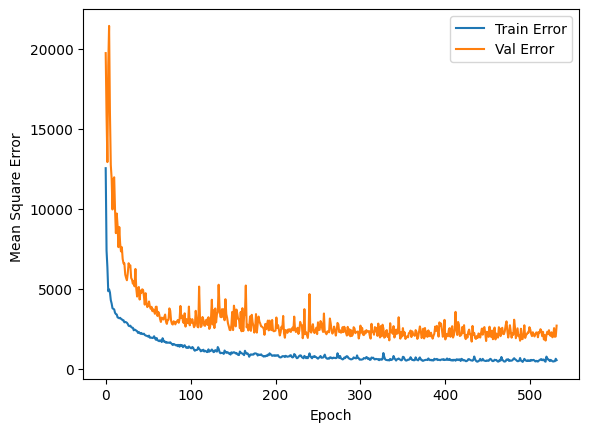

In [ ]:



hist = hist.reset_index()
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

#Predictions

In [ ]:
predictions = np.round(model.predict(X_test), 1)
predictions
len(predictions)
print("rmse ")
mean_squared_error(y_test, predictions, squared=False)
print("r2 ")
r2_score(y_test, predictions)

52/52 [==============================] - 0s 1ms/step


,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,dayOfWeek,year,date,rushHour,daySin,dayCos,monthSin,monthCos,hrSin,hrCos,seasonSin,seasonCos
1,0.0,0.0,0.000000,0.80,0.000000,0.204082,0.2727,0.833333,0.0,0.000000,0.0,0.600779,0.989739,0.75,0.933013,0.629410,0.982963,1.0,0.5
11,0.0,0.0,0.000000,0.81,0.333333,0.346939,0.3333,0.833333,0.0,0.000000,0.0,0.600779,0.989739,0.75,0.933013,0.629410,0.017037,1.0,0.5
21,0.0,0.0,0.333333,0.87,0.228070,0.387755,0.4091,0.833333,0.0,0.000000,0.0,0.600779,0.989739,0.75,0.933013,0.146447,0.853553,1.0,0.5
31,0.0,0.0,0.666667,0.71,0.263158,0.387755,0.4091,1.000000,0.0,0.001431,1.0,0.697431,0.959375,0.75,0.933013,0.933013,0.250000,1.0,0.5
41,0.0,0.0,0.333333,0.46,0.385965,0.346939,0.3333,1.000000,0.0,0.001431,1.0,0.697431,0.959375,0.75,0.933013,0.000000,0.500000,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16595,0.0,1.0,0.000000,0.69,0.000000,0.204082,0.2727,0.500000,1.0,0.998569,0.0,0.302569,0.959375,0.25,0.933013,1.000000,0.500000,0.5,1.0
16606,0.0,1.0,0.000000,0.39,0.228070,0.326531,0.3333,0.500000,1.0,0.998569,1.0,0.302569,0.959375,0.25,0.933013,0.017037,0.370590,0.5,1.0
16616,0.0,1.0,0.000000,0.75,0.000000,0.224490,0.2879,0.666667,1.0,1.000000,0.0,0.399221,0.989739,0.25,0.933013,0.853553,0.853553,0.5,1.0
16626,0.0,1.0,0.333333,0.40,0.192982,0.387755,0.4091,0.666667,1.0,1.000000,0.0,0.399221,0.989739,0.25,0.933013,0.370590,0.017037,0.5,1.0


1         40
11        56
21        34
31         8
41        53
        ... 
16595    121
16606    561
16616      4
16626    262
16636    110
Name: total, Length: 1644, dtype: int64

array([[ 28.5],
       [ 70.9],
       [ 40.2],
       ...,
       [ -1.8],
       [260.2],
       [122.2]], dtype=float32)

1644

rmse 


38.62676249964778

r2 


0.9554078686981414

In [ ]:
def predAndCsv(df, filename): 
    procDf = preprocess(pd.DataFrame(data = df, copy=True), procBikes.drop(columns=["registered", "casual", "total"]))
    predictions = model.predict(procDf)
    pd.DataFrame(predictions).clip(lower=0).to_csv(filename, index=False, header= ["predictions"])
    if (debug): return predictions

predAndCsv(holdout, "holdout-predictions.csv")
predAndCsv(mini, "mini-predictions.csv")
if(debug):
    debug_df = mini
    debug_df["predictions"] = predAndCsv(mini, "mini-predictions.csv")
    debug_df

 1/24 [>.............................] - ETA: 0s

C:\Users\spott\AppData\Local\Temp\ipykernel_9480\3717540687.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  proc['date'] = (datetimes - pd.datetime(1970,1,1)).dt.total_seconds()
C:\Users\spott\AppData\Local\Temp\ipykernel_9480\3717540687.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  proc['date'] = (datetimes - pd.datetime(1970,1,1)).dt.total_seconds()


24/24 [==============================] - 0s 1ms/step


array([[ 9.51461868e+01],
       [ 8.47841339e+01],
       [ 5.58258629e+01],
       [ 1.81472149e+01],
       [-1.74423468e+00],
       [-1.75251818e+00],
       [ 9.36728001e+00],
       [ 3.96317139e+01],
       [ 1.20939766e+02],
       [ 2.32802902e+02],
       [ 2.66779053e+02],
       [ 3.72683899e+02],
       [ 4.17010803e+02],
       [ 4.64694550e+02],
       [ 4.49851105e+02],
       [ 4.34780090e+02],
       [ 4.15777252e+02],
       [ 3.49676727e+02],
       [ 1.93201584e+02],
       [ 1.33649185e+02],
       [ 1.65123199e+02],
       [ 1.06572617e+02],
       [ 9.33752594e+01],
       [ 8.68208084e+01],
       [ 7.67535248e+01],
       [ 9.65918808e+01],
       [ 8.63671722e+01],
       [ 3.59148369e+01],
       [ 1.12174225e+01],
       [ 6.03312874e+00],
       [ 1.39894199e+01],
       [ 3.06522274e+01],
       [ 1.09734543e+02],
       [ 2.02275177e+02],
       [ 3.00360901e+02],
       [ 3.84022003e+02],
       [ 4.21305908e+02],
       [ 4.65322937e+02],
       [ 4.5

#save model

In [ ]:

# model.save('Module5Model')

INFO:tensorflow:Assets written to: nathan-model\assets
